<a href="https://colab.research.google.com/github/arthtalati/Deep-Learning-based-Authorship-Identification/blob/master/preprocessing_data_%26_baseline_models_refined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing and character level models

In [ ]:
import pandas as pd
import numpy as np
import os
import dill
import pandas as pd
import glob, csv
import nltk
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
nltk.download('punkt') # Download this as this allows you to tokenize words in a string.
lemmatizer = WordNetLemmatizer()


import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import re
import string
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip '/content/drive/My Drive/519/Project/C50.zip'

## TRAIN PRE-PROCESS Sentence level

In [ ]:
train_file_df = pd.DataFrame()
temp_df = pd.DataFrame()
for i, filepath in enumerate(glob.iglob('/content/C50train/*/*.txt')):
    print('Analysing', i , ' -> ', ' of Author ', str(filepath.split("/")[3]))
    temp_df = pd.read_csv(filepath, delimiter="\t", header = None, error_bad_lines=False, quoting = csv.QUOTE_NONE, encoding='utf-8')
    temp_df['Author'] = filepath.split("/")[3]
    temp_frame = [train_file_df, temp_df]
    train_file_df = pd.concat(temp_frame)
    
train_file_df = train_file_df.rename(columns={ 0 : 'text'})

In [ ]:
train_file_df

## Train Preprocess Article level

In [ ]:
# article level

train_file_article_df = pd.DataFrame(columns=['text','Author'])
temp_df = pd.DataFrame(columns=['text','Author'])

for i, filepath in enumerate(glob.iglob('/content/C50train/*/*.txt')):
  print('Analysing', i , ' -> ', ' of Author ', str(filepath.split("/")[3]))
  with open(filepath, 'r') as myfile:
    data = myfile.read()
  # tokens = word_tokenize(data)
  train_file_article_df = train_file_article_df.append({'text' : data ,
                                                        'Author' : str(filepath.split("/")[3])} , ignore_index=True)


In [ ]:
# article level test

test_file_article_df = pd.DataFrame(columns=['text','Author'])
temp_df = pd.DataFrame(columns=['text','Author'])

for i, filepath in enumerate(glob.iglob('/content/C50test/*/*.txt')):
  print('Analysing', i , ' -> ', ' of Author ', str(filepath.split("/")[3]))
  with open(filepath, 'r') as myfile:
    data = myfile.read()
  # tokens = word_tokenize(data)
  test_file_article_df = test_file_article_df.append({'text' : data ,
                                                        'Author' : str(filepath.split("/")[3])} , ignore_index=True)


In [ ]:
train_file_article_df = train_file_article_df.sample(frac=1).reset_index(drop=True)
# data = data.drop(columns='level_0')
train_file_article_df

In [ ]:
test_file_article_df = test_file_article_df.sample(frac=1).reset_index(drop=True)
# data = data.drop(columns='level_0')
test_file_article_df

In [ ]:
data = pd.concat([train_file_article_df, test_file_article_df], ignore_index=True)
                                          
freq = pd.DataFrame({'Author':list(set(train_file_article_df.Author)),
                     'nostoextract':[70]*50, })

def bootstrap(data, freq):
    freq = freq.set_index('Author')

    # This function will be applied on each group of instances of the same
    # class in `data`.
    def sampleClass(classgroup):
        cls = classgroup['Author'].iloc[0]
        nDesired = freq.nostoextract[cls]
        nRows = len(classgroup)

        nSamples = min(nRows, nDesired)
        return classgroup.sample(nSamples)

    samples = data.groupby('Author').apply(sampleClass)

    # If you want a new index with ascending values
    # samples.index = range(len(samples))

    # If you want an index which is equal to the row in `data` where the sample
    # came from
    samples.index = samples.index.get_level_values(1)

    # If you don't change it then you'll have a multiindex with level 0
    # being the class and level 1 being the row in `data` where
    # the sample came from.

    return samples
mega_train = bootstrap(data,freq)

In [ ]:
mega_train

In [ ]:
mega_test = None
mega_train = mega_train.reset_index()
data = data.reset_index()

my_tot = range(5000)
row_list = list(mega_train['index'])

sep_list = []
for i in my_tot:
  if (i not in row_list):
    sep_list.append(1)
  else:
    sep_list.append(0)


data['hopeful_test'] = sep_list
mega_test = data[data['hopeful_test'] == 1]
mega_test.Author.value_counts()

In [ ]:
mega_train.Author.value_counts()

In [ ]:
mega_test.to_csv('mega_test_70_30.csv',index = False, header=True)
!cp mega_test_60_40.csv "/content"

cp: 'mega_test_60_40.csv' and '/content/mega_test_60_40.csv' are the same file


In [ ]:
mega_train.to_csv('mega_train_70_30.csv',index = False, header=True)
!cp mega_train_60_40.csv "/content"

In [ ]:
mega_train['index']

In [ ]:
data

In [ ]:
row_list = list(mega_train['index'])
data.loc[row_list]

In [ ]:
mega_test = data[data['hopeful_test'] == 1]

In [ ]:
mega_test.Author.value_counts()

In [ ]:
my_tot = range(5000)

sep_list = []
for i in my_tot:
  if (i not in row_list):
    sep_list.append(1)
  else:
    sep_list.append(0)


data['hopeful_test'] = sep_list
mega_test = data[data['hopeful_test'] == 1]
mega_test.Author.value_counts()

In [ ]:
train_file_article_df['period'] = train_file_article_df['text'].apply(lambda x : x.count("."))

# train_file_article_df.iloc[0][0].count('.')

In [ ]:
with open('/content/C50train/AaronPressman/2537newsML.txt', 'r') as myfile:
  data = myfile.read()
# data.count('\n\n') + 1

lines = data.split('\n')
count = 0
if not line.strip() == '':
    count += 1

print(count)

1


In [ ]:
data

'A break-in at the U.S. Justice Department\'s World Wide Web site last week highlighted the Internet\'s continued vulnerability to hackers.\nUnidentified hackers gained access to the department\'s web page on August 16 and replaced it with a hate-filled diatribe labelled the "Department of Injustice" that included a swastika and a picture of Adolf Hitler.\nJustice officials quickly pulled the plug on the vandalised page, but the security flaws that allowed hackers to gain entry likely exist in thousands of other corporate and government web sites, security experts said.\n"The vast majority of sites are vulnerable," said Richard Power, senior analyst at the Computer Security Institute. "The Justice Department shouldn\'t be singled out."\nJustice Department officials said the compromised web site was not connected to any computers containing sensitive files. The web site (http://www.usdoj.gov) included copies of press releases, speeches and other publicly available information.\nThe secu

## Test Preprocess Article Level

In [ ]:
# article level

test_file_article_df = pd.DataFrame(columns=['text','Author'])
temp_df = pd.DataFrame(columns=['text','Author'])

for i, filepath in enumerate(glob.iglob('/content/C50test/*.txt')):
  print('Analysing', i , ' -> ', ' of Author ', str(filepath.split("/")[3]))
  with open(filepath, 'r') as myfile:
    data = myfile.read()
  tokens = word_tokenize(data)
  test_file_article_df = test_file_article_df.append({'text' : tokens ,
                                                        'Author' : str(filepath.split("/")[3])} , ignore_index=True)


test_file_article_df.to_csv('test_article_lvl.csv', header=True, index=False) 

In [ ]:
test_file_article_df

,text,Author
0,"[Equitas, ,, created, to, run, off, Lloyd, 's,...",SimonCowell
1,"[The, numbers, of, Names, at, Lloyd, 's, of, L...",SimonCowell
2,"[British, composite, insurer, Royal, &, amp, ;...",SimonCowell
3,"[British, mutual, insurer, Norwich, Union, sai...",SimonCowell
4,"[British, insurance, broker, and, risk, manage...",SimonCowell
...,...,...
2495,"[Forget, applets, ,, baud, rates, and, java, ....",KirstinRidley
2496,"[Cable, and, Wireless, Communications, (, CWC,...",KirstinRidley
2497,"[USA, Global, Link, ,, the, U.S.-based, callba...",KirstinRidley
2498,"[Tumbling, trade, barriers, are, triggering, h...",KirstinRidley


In [ ]:
# create neew col with author number mappings for ML
auth_sort = sorted(train_file_df['Author'].unique())
dictOfAuthors = { i : auth_sort[i] for i in range(0, len(auth_sort) ) }
swap_dict = {value:key for key, value in dictOfAuthors.items()}
train_file_df['Author_num'] = train_file_df['Author'].map(swap_dict)

##TEST PRE-PROCESS

In [ ]:
test_file_df = pd.DataFrame()
temp_df = pd.DataFrame()

for i, filepath in enumerate(glob.iglob('/content/C50test/*/*.txt')):
    print('Analysing', i , ' -> ', ' of Author ', str(filepath.split("/")[3]))
    temp_df = pd.read_csv(filepath, delimiter="\t", header = None, error_bad_lines=False, quoting = csv.QUOTE_NONE, encoding='utf-8')
    temp_df['Author'] = filepath.split("/")[3]
    temp_frame = [test_file_df, temp_df]
    test_file_df = pd.concat(temp_frame)
    
test_file_df = test_file_df.rename(columns={ 0 : 'text'})
test_file_df.head(3)

In [ ]:
# avg number of sentences of each author in test data
test_file_df.groupby('Author').count().mean()

text    880.2
dtype: float64

In [ ]:
# count of sentences of each author in test data
test_file_df.groupby('Author').count()

In [ ]:
test_file_df['Author_num'] = test_file_df['Author'].map(swap_dict)

In [ ]:
test_file_df['Author'].unique()

## Ranjani Stop Words 

In [ ]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
vocab_final = test_file_df['text']


stop = stopwords.words('english')
#print(stop)
test_file_df['text'] = test_file_df.text.str.lower()    #converting to lower case
test_file_df["text"] = test_file_df['text'].str.replace('[^\w\s]','')     #removing punctuations
test_file_df['tokenized_sents'] = test_file_df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
print(test_file_df['tokenized_sents'])
print(" ")
print(test_file_df['tokenized_sents'].apply(lambda x: [item for item in x if item not in stop]))


"""stops = set(stopwords.words("english"))    
print(stops)              
print [i for i in vocab_final.split() if i not in stops]"""

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
0     [the, australian, government, appointed, stock...
1     [the, float, is, estimated, to, raise, a, mini...
2     [finance, minister, john, fahey, said, he, wan...
3     [i, want, it, ready, to, go, to, the, market, ...
4     [but, i, am, not, saying, it, will, he, said, ...
                            ...                        
12    [management, feels, it, is, difficult, to, mai...
13    [for, instance, the, nongovernment, railways, ...
14    [management, and, labour, at, takeda, chemical...
15    [masao, yuki, executive, vice, president, at, ...
16    [asahi, banks, osaka, said, it, is, inevitable...
Name: tokenized_sents, Length: 44010, dtype: object
 
0     [australian, government, appointed, stockbroke...
1     [float, estimated, raise, minimum, a80, billio...
2     [finance, minister, john, fahey, said, wanted,...
3     [want, ready, go, market, year, calen

'stops = set(stopwords.words("english"))    \nprint(stops)              \nprint [i for i in vocab_final.split() if i not in stops]'

In [ ]:
#Creating Bag of words
def make_bag_of_words(input_df):

  import collections, re
  texts = input_df
  bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
              for txt in texts]
  temp = remove_stopwords(input_df)
  dict_bag = collections.Counter([y for x in input_df.text.values.flatten() for y in x.split()])
  dict_bag = pd.DataFrame.from_dict(dict_bag, orient='index').reset_index()

  return dict_bag

In [ ]:
make_bag_of_words(test_file_df)

## ARTH Hist of characters

In [ ]:
def get_char_hist(auth_name, which_set):
  data = []
  path = '/content/C50' + str(which_set) + '/' + str(auth_name) + '/*.txt'
  for i, filepath in enumerate(glob.iglob(path)):
      # print('Analysing', i , ' -> ', ' of Author ', str(filepath.split("/")[3]))
      with open(filepath, 'r') as file:
        data.append(file.read().replace('\n', ''))

  seperator = ','
  all_data = seperator.join(data)
  figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
  valid_all_data = re.sub(r"[^A-Za-z]+", '', all_data)
  sentence = valid_all_data.lower()

  # Convert the string to an array of integers
  numbers = np.array([ord(c) for c in sentence])
  u = np.unique(numbers)
  # Make the integers range from 0 to n so there are no gaps in the histogram
  # [0][0] was a hack to make sure `np.where` returned an int instead of an array.
  ind = [np.where(u==n)[0][0] for n in numbers]
  bins = range(0,len(u)+1)
  hist, bins = np.histogram(ind, bins)

  plt.bar(bins[:-1], hist, align='center')
  plt.xticks(np.unique(ind)[:], [str(chr(n)) for n in set(numbers)])
  plt.grid()
  plt.show()


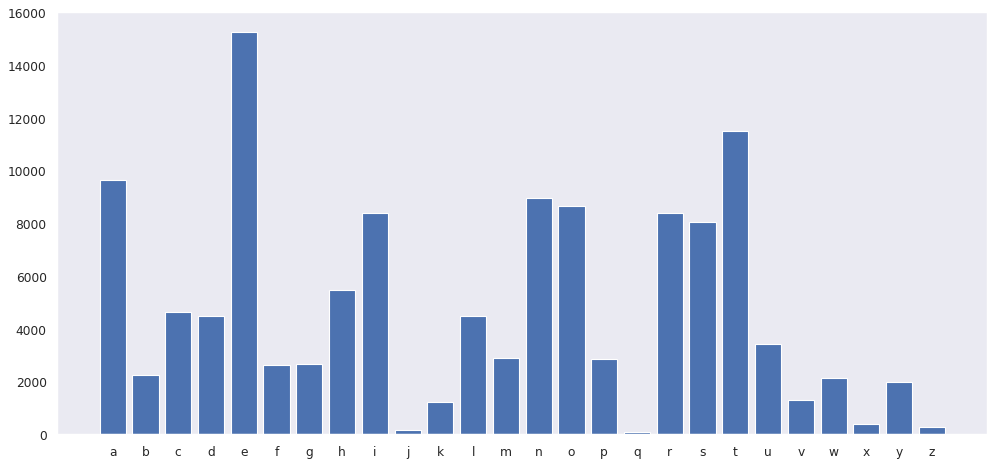

In [ ]:
get_char_hist('AlanCrosby', 'test')

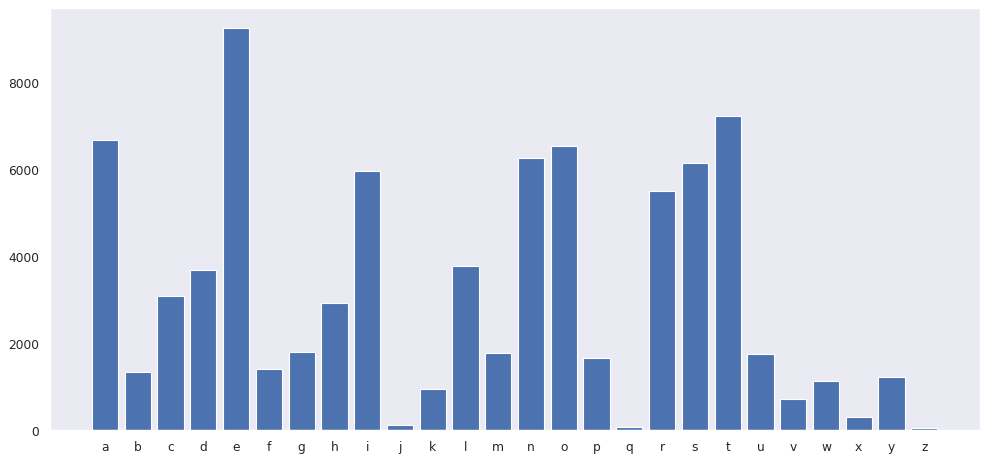

In [ ]:
get_char_hist('LydiaZajc', 'train')

In [ ]:
master_author_list = ['KevinMorrison', 'AlanCrosby', 'ToddNissen', 'KevinDrawbaugh',
                      'KouroshKarimkhany', 'JohnMastrini', 'KeithWeir', 'AaronPressman',
                      'ScottHillis', 'HeatherScoffield', 'PeterHumphrey',
                      'PatriciaCommins', 'BernardHickey', 'MarcelMichelson',
                      'GrahamEarnshaw', 'JoeOrtiz', 'SarahDavison', 'SimonCowell',
                      'WilliamKazer', 'JoWinterbottom', "LynneO'Donnell", 'JimGilchrist',
                      'MatthewBunce', 'LydiaZajc', 'AlexanderSmith', 'EricAuchard',
                      'TheresePoletti', 'BradDorfman', 'KarlPenhaul', 'NickLouth',
                      'PierreTran', 'MichaelConnor', 'LynnleyBrowning', 'EdnaFernandes',
                      'MarkBendeich', 'MartinWolk', 'RobinSidel', 'RogerFillion',
                      'SamuelPerry', 'DavidLawder', 'JanLopatka', 'BenjaminKangLim',
                      'DarrenSchuettler', 'MureDickie', 'TanEeLyn', 'TimFarrand',
                      'KirstinRidley', 'JonathanBirt', 'JaneMacartney', 'FumikoFujisaki']

In [ ]:
def give_me_everything(author):
  data = []
  list_of_dicts= []
  list_alpha = list(string.ascii_lowercase)
  path = '/content/C50train/' + str(author) + '/*.txt'
  for i, filepath in enumerate(glob.iglob(path)):
      with open(filepath, 'r') as file:
        read_file = file.read().replace('\n', '')
        clean_file = re.sub(r"[^A-Za-z]+", '', read_file)
        arth = {} 
        for keys in clean_file.lower(): 
          arth[keys] = arth.get(keys, 0) + 1
        for item in list_alpha:
          if (item not in arth.keys()):
            arth.update( {str(item) : 0} )
        sorted_dict = {k: arth[k] for k in sorted(arth)}
        list_of_dicts.append(sorted_dict)
  aut_feature = []
  for i in range(0,26,1):
    a_list = []
    for dict_ in list_of_dicts:
      a_list.append(list(dict_.values())[i])
    # print("median value appended for char", list(dict_.keys())[i], "is",  np.median(a_list))
    aut_feature.append(np.median(a_list))
  return aut_feature

In [ ]:
feature_final = []
for author in master_author_list:
  feature_final.append(give_me_everything(author))
features_df = pd.DataFrame(feature_final)
features_df = features_df.drop(columns={0, 4 ,8 ,14 ,20}) # vowles

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(features_df)
# print(scaler.mean_)

transformed_df = scaler.transform(features_df)

In [ ]:
transformed_df

array([[0.54411765, 0.4375    , 0.66459627, ..., 0.26315789, 0.65079365,
        0.08333333],
       [0.29411765, 0.32638889, 0.42857143, ..., 0.        , 0.38095238,
        0.5       ],
       [0.47058824, 0.63194444, 0.70186335, ..., 0.10526316, 0.6984127 ,
        0.16666667],
       ...,
       [0.48529412, 0.52777778, 0.60248447, ..., 0.10526316, 0.41269841,
        0.16666667],
       [0.63235294, 0.71527778, 1.        , ..., 0.21052632, 0.88888889,
        0.33333333],
       [0.97058824, 0.53472222, 0.65217391, ..., 0.        , 0.84126984,
        0.16666667]])

In [ ]:
test_feature_final = scaler.transform(test_feature_final)

In [ ]:
X = transformed_df
y = range(0,50,1)

In [ ]:
max_val = 0
for i in range(0,2500,1):
  ttt = np.dot 

0.5

## Arth TEST SVC Model

In [ ]:
def give_me_everything_to_test(author):
  data = []
  list_of_dicts= []
  list_alpha = list(string.ascii_lowercase)
  path = '/content/C50test/' + str(author) + '/*.txt'
  for i, filepath in enumerate(glob.iglob(path)):
      with open(filepath, 'r') as file:
        read_file = file.read().replace('\n', '')
        clean_file = re.sub(r"[^A-Za-z]+", '', read_file)
        arth = {} 
        for keys in clean_file.lower(): 
          arth[keys] = arth.get(keys, 0) + 1
        for item in list_alpha:
          if (item not in arth.keys()):
            arth.update( {str(item) : 0} )
        sorted_dict = {k: arth[k] for k in sorted(arth)}
        list_of_dicts.append(sorted_dict)
  return list_of_dicts

In [ ]:
test_feature_final = pd.DataFrame()
for author in master_author_list:
  aut_df = give_me_everything_to_test(str(author))
  aut_df = pd.DataFrame(aut_df)
  frames = [test_feature_final, aut_df]
  test_feature_final = pd.concat(frames)
test_feature_final = test_feature_final.drop(columns={'a', 'e' ,'i' ,'o' ,'u'})

In [ ]:
test_feature_final

,b,c,d,f,g,h,j,k,l,m,n,p,q,r,s,t,v,w,x,y,z
0,36,45,69,57,30,80,6,13,95,48,132,36,2,130,127,200,12,37,4,25,0
1,46,68,62,54,30,83,4,16,125,51,137,50,0,146,117,215,25,36,3,27,0
2,48,73,94,44,91,122,3,34,92,64,217,46,3,171,184,286,41,80,6,50,1
3,66,123,119,62,51,146,2,36,164,82,241,85,0,212,266,381,52,65,10,59,3
4,36,49,92,39,40,74,4,20,108,50,156,54,0,152,144,162,27,32,7,37,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,78,90,118,65,62,129,17,62,137,59,264,57,3,156,194,246,30,42,3,34,0
46,23,126,119,74,41,124,10,31,115,95,224,58,1,171,245,286,35,50,6,35,1
47,47,91,133,63,41,94,11,34,103,113,278,65,0,193,284,277,31,43,2,35,2
48,40,141,141,66,45,123,10,33,114,97,254,63,2,233,276,320,41,43,7,48,2


In [ ]:
transformed_test_df = scaler.transform(test_feature_final)

In [ ]:
fin_temp = []
for i in range(0,50,1):
  for j in range(0,50,1):
    fin_temp.append(i) 

In [ ]:
#insert model random forest, svm etc

# for Example


# from sklearn.svm import SVC

# clf_new = SVC(gamma='auto')
# clf_new.fit(X_train, y_test)

In [ ]:
y_pred = clf.predict(transformed_test_df)

In [ ]:
(fin_temp == y_pred).sum()/ len(fin_temp)

0.1288

## new training approach

In [ ]:
def give_me_everything_to_train(author):
  data = []
  list_of_dicts= []
  list_alpha = list(string.ascii_lowercase)
  path = '/content/C50train/' + str(author) + '/*.txt'
  for i, filepath in enumerate(glob.iglob(path)):
      with open(filepath, 'r') as file:
        read_file = file.read().replace('\n', '')
        clean_file = re.sub(r"[^A-Za-z]+", '', read_file)
        arth = {} 
        for keys in clean_file.lower(): 
          arth[keys] = arth.get(keys, 0) + 1
        for item in list_alpha:
          if (item not in arth.keys()):
            arth.update( {str(item) : 0} )
        sorted_dict = {k: arth[k] for k in sorted(arth)}
        list_of_dicts.append(sorted_dict)
  return list_of_dicts

train_feature_final = 0
train_feature_final = pd.DataFrame()
for author in master_author_list:
  aut_df = give_me_everything_to_train(str(author))
  aut_df = pd.DataFrame(aut_df)
  frames = [test_feature_final, aut_df]
  train_feature_final = pd.concat(frames)

In [ ]:
scaler = StandardScaler()
scaler.fit(train_feature_final)
# print(scaler.mean_)

transformed_train_df = scaler.transform(train_feature_final)

## K means

In [ ]:
# train 
X_train = transformed_train_df
y_train = range(0,50,1)
#test
X_test = transformed_test_df
y_test = fin_temp

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=26, init='k-means++',  n_init = 20, random_state=0).fit(X_train)

In [ ]:
y_predict_k = kmeans.predict(X_test)
(y_test == y_predict_k).sum()/ len(y_test)

0.014

In [ ]:
(X_train.shape, len(y_test))

((2550, 26), 2500)

In [ ]:
c

In [ ]:
y_predict_svm = clf_new.predict(X_test)
(y_test == y_predict_svm).sum()/ len(y_test)

## TF - IDF Approach...

In [ ]:
!pip install num2words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
import num2words

import nltk
import os
import string
import numpy as np
import copy
import pandas as pd
import pickle
import re
import math

# %load_ext autotime

In [ ]:
def convert_lower_case(data):
    return np.char.lower(data)

In [ ]:
def remove_stop_words(data):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

In [ ]:
def remove_punctuation(data):
    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n"
    for i in range(len(symbols)):
        data = np.char.replace(data, symbols[i], ' ')
        data = np.char.replace(data, "  ", " ")
    data = np.char.replace(data, ',', '')
    return data

In [ ]:
def remove_apostrophe(data):
    return np.char.replace(data, "'", "")

In [ ]:
def stemming(data):
    stemmer= PorterStemmer()
    
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        new_text = new_text + " " + stemmer.stem(w)
    return new_text

In [ ]:
def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text

In [ ]:
def preprocess(data):
    data = convert_lower_case(data)
    data = remove_punctuation(data) #remove comma seperately
    data = remove_apostrophe(data)
    data = remove_stop_words(data)
    data = convert_numbers(data)
    data = stemming(data)
    data = remove_punctuation(data)
    data = convert_numbers(data)
    data = stemming(data) #needed again as we need to stem the words
    data = remove_punctuation(data) #needed again as num2word is giving few hypens and commas fourty-one
    data = remove_stop_words(data) #needed again as num2word is giving stop words 101 - one hundred and one
    return data

In [ ]:

for i in dataset[:N]:
    file = open(i[0], 'r', encoding="utf8", errors='ignore')
    text = file.read().strip()
    file.close()

    processed_text.append(word_tokenize(str(preprocess(text))))
    processed_title.append(word_tokenize(str(preprocess(i[1]))))